In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
df = pd.read_csv(r'D:\ML\titanic_comp\train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Quick Look at the Data Structure

In [5]:
cop_data = df.copy()
cop_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.drop(columns=['PassengerId', 'Name','Ticket'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [9]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
# too much null values in Cabin and it is not very important column
df.drop(columns=['Cabin'], inplace=True)

In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


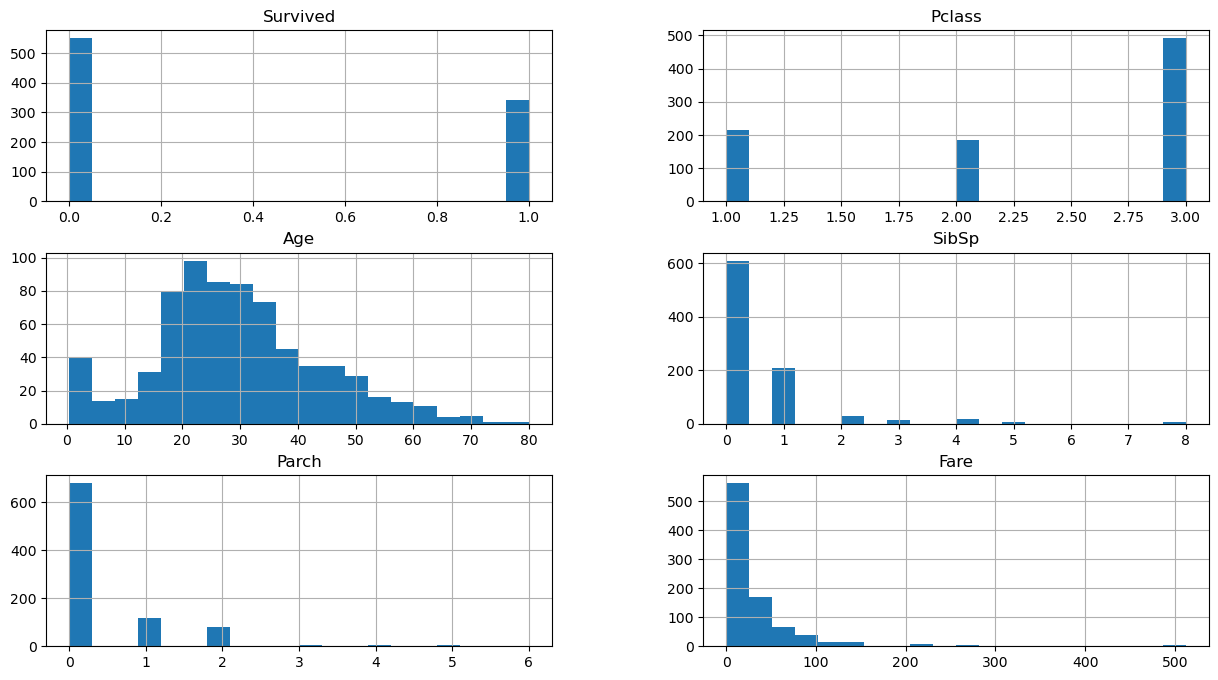

In [12]:
df.hist(bins = 20, figsize=(15,8))
plt.show()

- The dataset is **imbalanced**.. the number of passengers who **did not survive** is higher than those who did.
- Passengers were divided into **three classes**: First, Second, and Third.
   - Most passengers traveled in **Third Class**, which explains the **lower average fare**.
- The majority of passengers were aged between 20 and 30 years old.
- About 75% of passengers had only one sibling/spouse (SibSp).
- The maximum number of parents/children (Parch) on board was 6, but most passengers were traveling alone.
- The average fare was around 32.did.  

# EDA

In [15]:
train, test = train_test_split(df, train_size = 0.8, random_state = 42)
train.shape, test.shape

((712, 8), (179, 8))

In [16]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         140
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

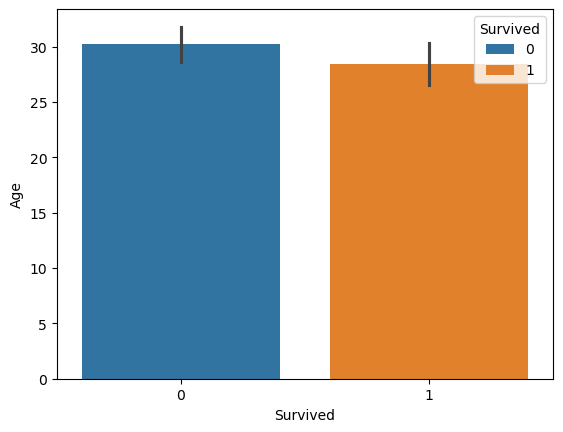

In [17]:
# AgeSur = train.groupby('Survived')['Age'].mean().reset_index()
sns.barplot(data = train, x = 'Survived', y = 'Age', hue = 'Survived' )
plt.show()

- Age don't depend on Survivance
- it is skewed so replacing by median is a good choice

In [19]:
train['Age'] = train['Age'].fillna(train.Age.median())

In [20]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [21]:
train.isna().sum().sum()

0

In [22]:
train.duplicated().sum()

90

In [23]:
train.drop_duplicates(inplace=True, keep = 'first')

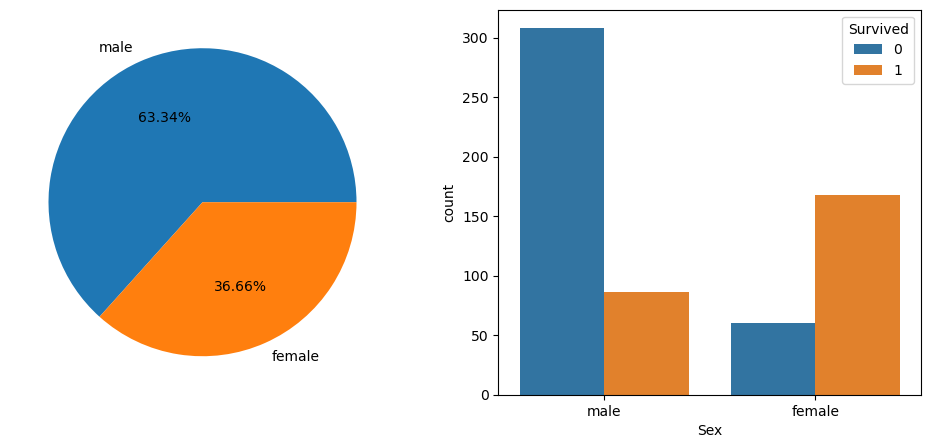

In [24]:
sex = train.Sex.value_counts()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(sex, labels = sex.index, autopct='%1.2f%%')
plt.subplot(1,2,2)
sns.countplot(data = train, x = 'Sex', hue = 'Survived')
plt.show()

- Although number of males are double of females, the number of females survived are more than males

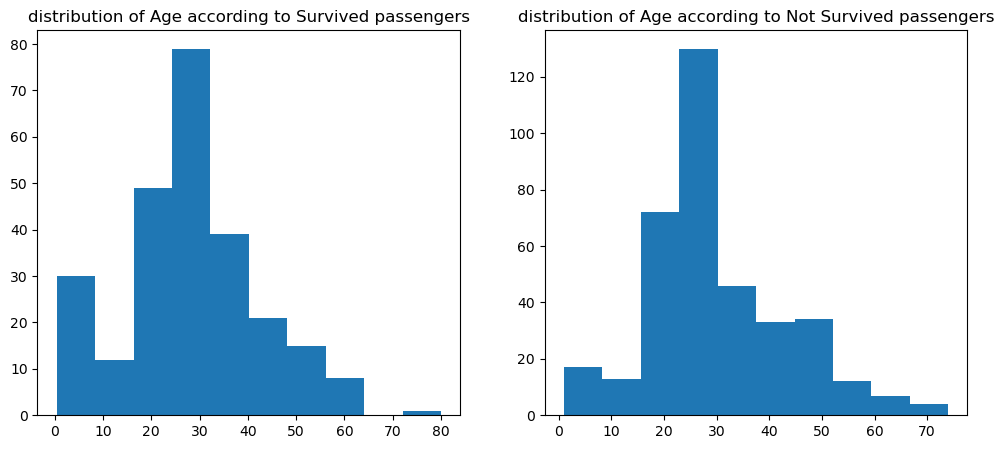

In [26]:
train_sur = train[train['Survived']==1]
train_notsur = train[train['Survived']==0]
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(train_sur.Age)
plt.title('distribution of Age according to Survived passengers')
plt.subplot(1,2,2)
plt.hist(train_notsur.Age)
plt.title('distribution of Age according to Not Survived passengers')
plt.show()

In [27]:
Class = train.value_counts('Pclass')

In [28]:
class_sur = train.groupby('Pclass')['Survived'].sum().reset_index()

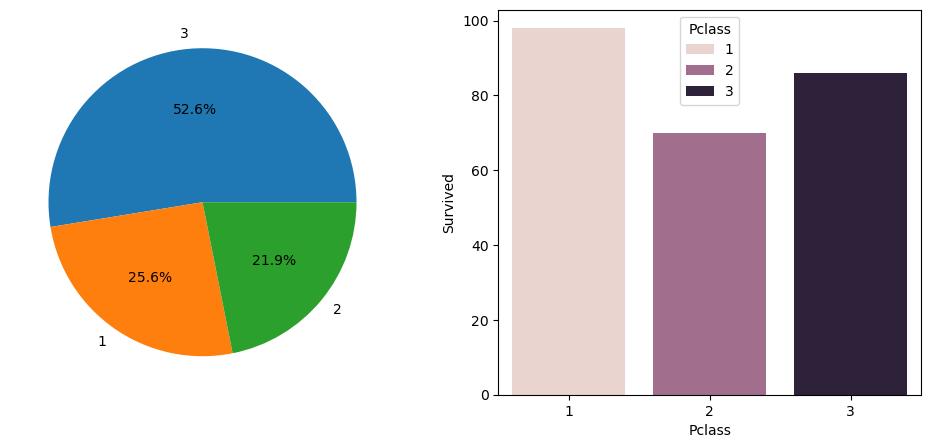

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(Class, labels = Class.index, autopct = '%1.1f%%')
plt.subplot(1,2,2)
sns.barplot(data = class_sur, x = 'Pclass', y='Survived', hue = 'Pclass')
plt.show()

- Although the third class includes many passengers, most survivals from the first class

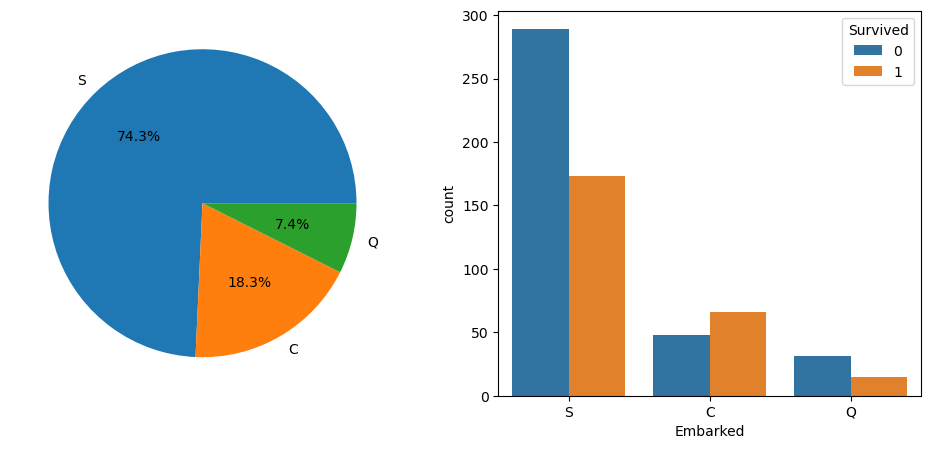

In [31]:
port = train.Embarked.value_counts()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(port, labels = port.index, autopct = "%1.1f%%")
plt.subplot(1,2,2)
sns.countplot(data=train, x = 'Embarked', hue= 'Survived')
plt.show()

- The **Port of Embarkation** does not significantly affect survival.  
- Logically, the majority of passengers boarded from **Southampton**, making them the largest group.  
- As a result, the percentages of survival and non-survival largely reflect this imbalance.  


In [33]:
train.groupby('Pclass')['Fare'].mean()
# very logical that first class has the highest Fare

Pclass
1    90.722118
2    21.668873
3    13.790073
Name: Fare, dtype: float64

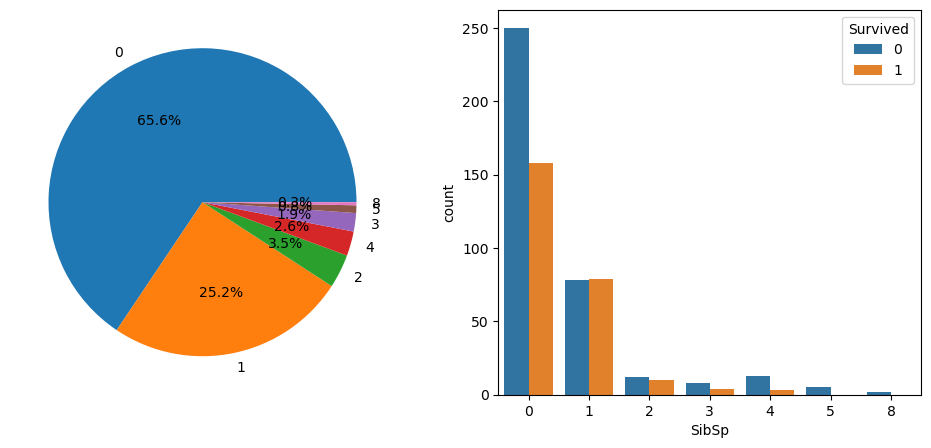

In [34]:
bro = train.SibSp.value_counts()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(bro, labels = bro.index, autopct = "%1.1f%%")
plt.subplot(1,2,2)
sns.countplot(data=train, x = 'SibSp', hue= 'Survived')
plt.show()

- number of siblings / spouses aboard the Titanic column doesn't affect much
- The percentages of survival and non-survival largely reflect this imbalance.

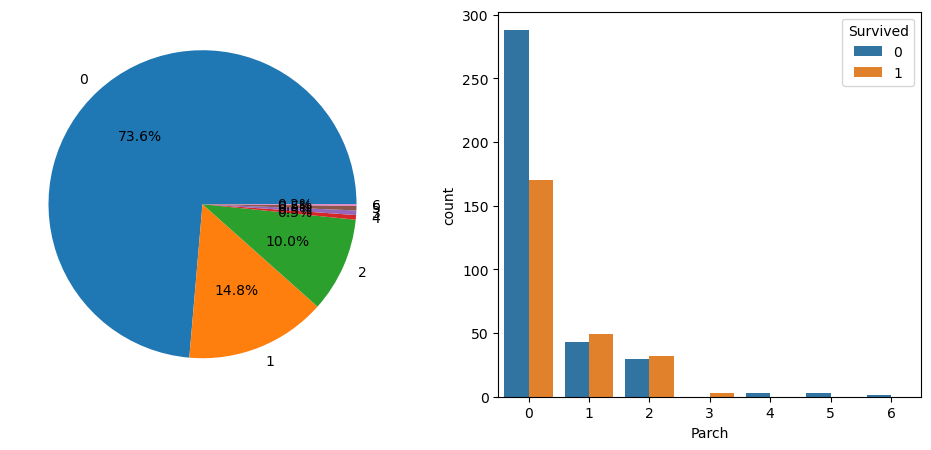

In [36]:
fam = train.Parch.value_counts()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(fam, labels = fam.index, autopct = "%1.1f%%")
plt.subplot(1,2,2)
sns.countplot(data=train, x = 'Parch', hue= 'Survived')
plt.show()

- same idea, doesn't have big effect

In [38]:
train['Relative_on _board']=train['Parch']+train['SibSp']

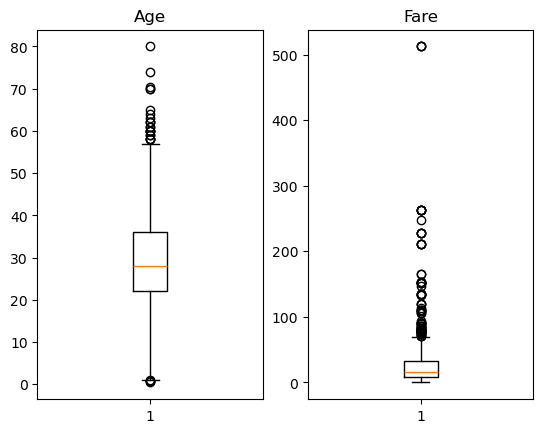

In [39]:
train
numeric_cols = ['Age', 'Fare']
for i, col in enumerate(numeric_cols):
    plt.subplot(1,2,i+1)
    plt.boxplot(train[col])
    plt.title(col)
plt.show()

## Remove Outliers

In [41]:
def outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3-q1
    min = q1 - 1.5*IQR
    max = q3 + 1.5*IQR
    return data[data[col].between(min, max)]

In [42]:
train = outliers(train, 'Age')
train = outliers(train,'Fare')

In [43]:
train.shape

(514, 9)

# Data Preprocessing

In [45]:
X = train.drop(columns=['Survived'])
y = train['Survived']

In [46]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relative_on _board
331,1,male,45.5,0,0,28.5000,S,0
733,2,male,23.0,0,0,13.0000,S,0
382,3,male,32.0,0,0,7.9250,S,0
704,3,male,26.0,1,0,7.8542,S,1
813,3,female,6.0,4,2,31.2750,S,6


In [47]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked'])
X

,Pclass,Age,SibSp,Parch,Fare,Relative_on _board,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
331,1,45.5,0,0,28.5000,0,False,True,False,False,True
733,2,23.0,0,0,13.0000,0,False,True,False,False,True
382,3,32.0,0,0,7.9250,0,False,True,False,False,True
704,3,26.0,1,0,7.8542,1,False,True,False,False,True
813,3,6.0,4,2,31.2750,6,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
20,2,35.0,0,0,26.0000,0,False,True,False,False,True
71,3,16.0,5,2,46.9000,7,True,False,False,False,True
106,3,21.0,0,0,7.6500,0,True,False,False,False,True
270,1,28.0,0,0,31.0000,0,False,True,False,False,True


In [48]:
X.replace({True:1, False:0}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6216\4282342711.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({True:1, False:0}, inplace=True)


In [49]:
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X, y)
y.value_counts(), y_train_sm.value_counts()

(Survived
 0    329
 1    185
 Name: count, dtype: int64,
 Survived
 0    329
 1    329
 Name: count, dtype: int64)

In [50]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
RF = RandomForestClassifier(max_depth=10)
RF.fit(X_scaled,y)

RandomForestClassifier(max_depth=10)

In [52]:
y_val = RF.predict(X_scaled)
accuracy_score(y_val,y)

0.9202334630350194

# Pipeline

In [54]:
class Drop_cols(BaseEstimator):
    def __init__(self, cols):
        self.cols=cols

    def fit(self,document,y=None):
        return self

    def transform(self,data):
        return data.drop(columns=self.cols)

In [55]:
# columns Tansformer returns numpy array
process1 = ColumnTransformer(
    remainder='passthrough',
    transformers = [
        ('imputer1', SimpleImputer(strategy = 'median') ,['Age']),
        ('imputer2', SimpleImputer(strategy = 'most_frequent'), ['Embarked'])
    ]
)
process1.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Embarked'])])

In [56]:
class encode(BaseEstimator):
    def __init__(self,cols):
        self.cols=cols
    def fit(self,documnet, y=None):
        return self
    def transform(self,data):
        return pd.get_dummies(data, columns=self.cols)
        

In [57]:
class newcol(BaseEstimator):
    def __init__(self):
        pass

    def fit(self,X,y=None):
        return self

    def transform(self,data):
        data['Relatives_on _board']=data['Parch']+data['SibSp']
        return data

In [58]:
pipe = Pipeline(
    steps=[
        ('creating new columns' , newcol()),
        ('impute' , process1),
        ('Encode' , encode(['remainder__Sex', 'imputer2__Embarked'])),
        ('drop'   , Drop_cols(['remainder__PassengerId', 'remainder__Name', 'remainder__SibSp', 'remainder__Parch', 'remainder__Ticket', 'remainder__Cabin'])),
        ('Balance', SMOTE(random_state=42)),
        ('scale'  , MinMaxScaler()),
        # ('modeling', KNeighborsClassifier(n_neighbors= 4,weights='distance'))
        ('modeling', RandomForestClassifier(max_depth=10))
    ]
)

In [59]:
cop_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [60]:
X_pipe = cop_data.drop(columns=['Survived'])
y_pipe = cop_data['Survived']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_pipe, y_pipe, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((712, 11), (179, 11))

In [62]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('creating new columns', newcol()),
                ('impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer1',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age']),
                                                 ('imputer2',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Embarked'])])),
                ('Encode',
                 encode(cols=['remainder__Sex', 'imputer2__Embarked'])),
                ('drop',
                 Drop_cols(cols=['remainder__PassengerId', 'remainder__Name',
                                 'remainder__SibSp', 'remainder__Parch',
                                 'remainder__Ticket', 'remainder__Cabin'])),
                ('Balance', SMOTE(random_state=42)), ('scale', MinMaxScaler()),
                ('modeling', RandomForestClassifier(max_depth=10))])

In [63]:
testing = pd.read_csv(r'D:\ML\titanic_comp\test.csv')
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
y_pred = pipe.predict(X_train)

In [65]:
accuracy_score(y_train,y_pred)

0.9382022471910112

In [66]:
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.8435754189944135

In [67]:
y_pred_submit = pipe.predict(testing)

In [68]:
output = pd.DataFrame({"PassengerId":testing.PassengerId, "Survived":y_pred_submit})

In [69]:
output.to_csv('submission.csv', index=False)